In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
train_df = pd.read_csv('train_CSRqzyo.csv')
test_df = pd.read_csv('test_wYRkl1c.csv')

In [4]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'ID'],
      dtype='object')

In [5]:
train_df.shape

(8523, 11)

In [6]:
test_df.shape

(5681, 10)

In [7]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('LF','low fat').str.lower()

In [8]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('reg','regular')

In [9]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('LF','low fat').str.lower()

In [10]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('reg','regular')

In [11]:
test_df['Item_Fat_Content'].value_counts()

low fat    3668
regular    2013
Name: Item_Fat_Content, dtype: int64

In [12]:
me = train_df['Item_Weight'].mean()
train_df['Item_Weight'].fillna(me,inplace=True)

In [13]:
#test set fill na
m1 = test_df['Item_Weight'].mean()
test_df['Item_Weight'].fillna(m1,inplace=True)

In [14]:

train_df['Outlet_Size'].fillna('Medium',inplace=True)

In [15]:
test_df['Outlet_Size'].fillna('Medium',inplace=True)

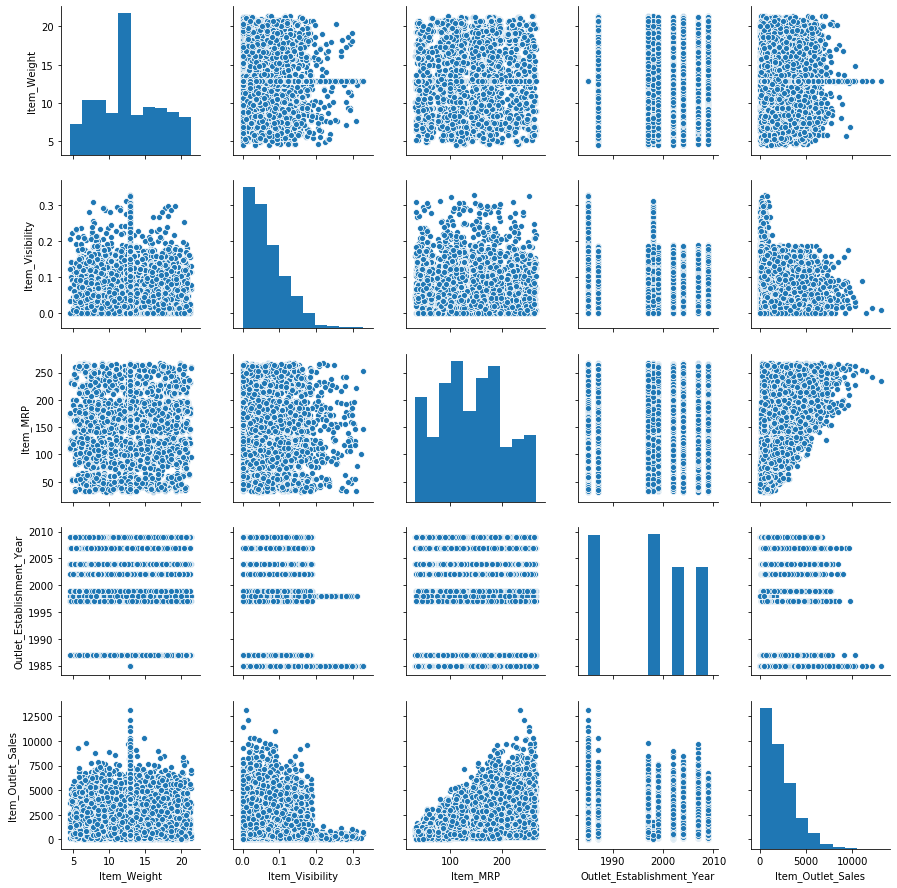

In [103]:
import seaborn as sns
sns.pairplot(train_df)

In [16]:
train_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
ID                           0
dtype: int64

In [17]:
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
ID                           0
dtype: int64

In [18]:
mylist = list(train_df.select_dtypes(include=['object']).columns)

In [19]:
mylist

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'ID']

In [20]:
mylist[:-1]

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [21]:
dummies = pd.get_dummies(train_df[mylist[:-1]], prefix= mylist[:-1])

In [22]:
dummies.head()

,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [23]:
train_df.drop(mylist, axis=1, inplace = True)

In [24]:
Xi = pd.concat([train_df,dummies],axis=1)

# Test Dummies

In [25]:
mylist1 = list(test_df.select_dtypes(include=['object']).columns)

In [26]:
mylist1

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'ID']

In [27]:
dummies_test = pd.get_dummies(test_df[mylist1[:-1]], prefix= mylist1[:-1])

In [28]:
dummies.head()



,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [29]:
test_df.drop(mylist1, axis=1, inplace = True)

In [30]:
yi = pd.concat([test_df,dummies_test],axis=1)

In [31]:
test_df = pd.DataFrame(yi,index=None,columns=yi.columns)

In [32]:
test_df.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Fat_Content_low fat           0
Item_Fat_Content_regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_High                   0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
O

# Splitting into X and Y

In [33]:
data = pd.DataFrame(Xi,index=None,columns=Xi.columns)

In [34]:
data.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_low fat           0
Item_Fat_Content_regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_High                   0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 1        0
O

In [35]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [36]:
X = data.drop(['Item_Outlet_Sales'],axis=1)

In [37]:
y = data['Item_Outlet_Sales']

In [38]:
y.shape

(8523,)

In [39]:
X.shape

(8523, 32)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print('X_train shape:', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape', y_test.shape)
print('percent in X_train:', X_train.shape[0]/(X_train.shape[0] + X_test.shape[0]))
print('percent in X_test:', X_test.shape[0]/(X_train.shape[0] + X_test.shape[0]))

X_train shape: (6818, 32)
y_train shape (6818,)
X_test shape: (1705, 32)
y_test shape (1705,)
percent in X_train: 0.7999530681684853
percent in X_test: 0.20004693183151473


In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
lr.score(X_test,y_test)

0.558090172528932

In [44]:
test_pred = lr.predict(X_test)

In [45]:
#predicting train set
train_pred = lr.predict(X_train)

In [46]:
y_pred = lr.predict(test_df)

In [47]:
y_pred = pd.DataFrame(y_pred,index=None,columns=['sales output'])

In [48]:
y_pred.to_csv('ran.csv')

In [49]:
lr.coef_

array([-2.80891702e+00, -4.18976127e+02,  1.55069285e+01,  3.73712215e+01,
       -1.03104268e+01,  1.03104268e+01, -1.38057925e+01,  1.17424881e+01,
        4.71856045e+01,  5.99554486e-01, -7.36692833e+01, -4.90350560e+01,
        4.11839541e+01, -1.76781664e+01, -8.74457003e+00, -9.43931825e+01,
        3.37888364e+01, -8.21421664e+01,  2.45997955e+02,  5.00787605e+00,
       -5.40206338e+01,  7.98258229e+00,  5.58479152e+02, -3.19951802e+02,
       -2.38527350e+02,  2.18718416e+02, -1.76130221e+01, -2.01105394e+02,
       -1.63226545e+03, -1.37350088e+02, -4.15073663e+02,  2.18468920e+03])

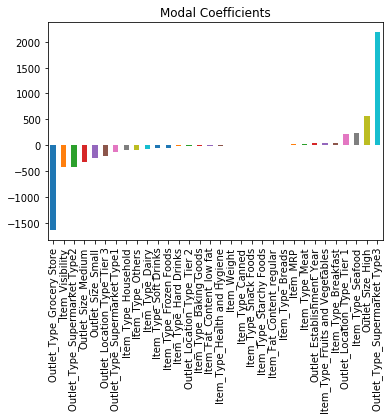

In [50]:
predictors = X_train.columns

coef = pd.Series(lr.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# Ridge regression

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge = Ridge(alpha=.001,normalize=True)

In [53]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [54]:
ridge_pred = ridge.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error as mse

In [56]:
mse(y_test,ridge_pred)

1310315.590243249

In [57]:
ridge.score(X_test,y_test)

0.5579748574367667

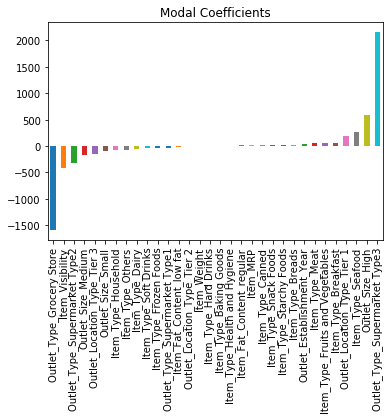

In [58]:
predictors = X_train.columns

coef = pd.Series(ridge.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# LASSO Regression

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso = Lasso(alpha=0.00001, normalize=True)

In [61]:
lasso.fit(X_train,y_train)

C:\Users\Del\Anaconda4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
lasso_pred = lasso.predict(X_test)

In [63]:
mse(y_test,lasso_pred)

1309973.913002125

In [64]:
lasso.score(X_test,y_test)

0.5580901196929307

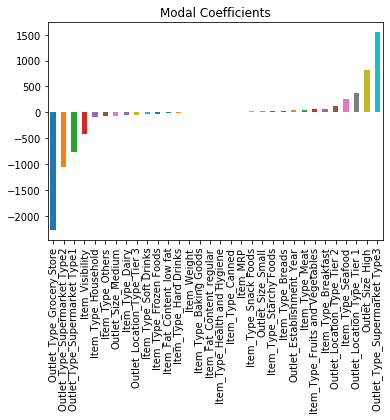

In [65]:
#plotting of each coeff
predictors = X_train.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
    

# Elastic Net regression

In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
elastic = ElasticNet(alpha=0.30,l1_ratio=1,normalize=True)

In [68]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.3, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
elastic.score(X_test,y_test)

0.5585063638584938

In [78]:
elastic_pred = elastic.predict(test_df)

In [79]:
ela = pd.DataFrame(elastic_pred,index=None,columns=['sales_output'])


In [80]:
ela.to_csv('final.csv')

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
ran = RandomForestRegressor()

In [99]:
ran.fit(X_train,y_train)

C:\Users\Del\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [100]:
ran.score(X_train,y_train)

0.915849903436881

In [101]:
ran.score(X_test,y_test)

0.4972522014806162

In [102]:
ran_pred = ran.predict(test_df)